# Project for the 'Programming for Data Analysys'
***

### Table of content
[1. Problem statement](#par1)<br>
[2. Simulate the data using``numpy.random`` package](#par2)<br>
[2.1 Simulate single variable](#par2.1)<br>
[2.1.1 Perfect process](#par2.1.1)<br>
[2.1.1 Simulate 'special causes'](#par2.1.2)<br>
[2.2 Simulate scrap ratio based on 10 dimensions](#par2.2)<br>
[3. Analise the data](#par3)<br>
<hr>

### Import all the packages

In [1]:
# import all the packackes used in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create the new instance of the numpy psudorandom numbers Generator
rng = np.random.default_rng()

<a id="par1"></a>
## 1. Problem statement

- Single manufacturing process step 
- Each part has 10 measured dimenions
    - Some dimensions are correlated
- If any of the 10 dimensions is measured outside of the specified limit, part is scrapped
- Parts are manufactured in batches of 10
- Tools are changes after batch is completed

<a id="par2"></a>
## 2. Simulate the data using ```numpy.random``` package

<a id="par2.1"></a>
### 2.1 Simulate single variable

<a id="par2.1.1"></a>
#### 2.1.1 Perfect process

Distribution of a measurements of a single dimension in the stable manufacturing process (process that has no special causes) follows normal distribution.

##### Define Dim1 attributes

Process capability:

$$
C_{p}=\frac{USL-LSL}{6\sigma}
$$

Given process capability, we can calculate the underlying process standard deviation


$$
\sigma=\frac{USL-LSL}{6 C_{p}}
$$

In [3]:
# Nominal dimension
mu = 9.5
# Upper and Lower tollerances
lsl, usl = 9.4, 9.6
# Process capability
cp = 3
# Number of observations
n=1000

In [4]:
dim1 = pd.Series(np.random.normal(mu, (usl-lsl)/(6*cp) , n))

##### Show distribution of dim1 using Histogram

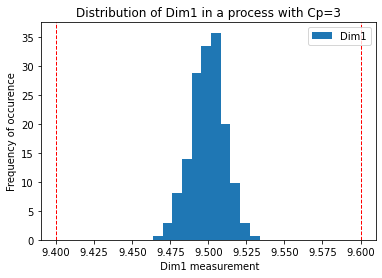

In [5]:
# Calculate number of Histogram bins using Sturge’s Rule
# as per: https://www.statisticshowto.com/choose-bin-sizes-statistics/
bins = int(np.round(np.log10(n)*3.322+1))

plt.hist(dim1, bins, density=True, label='Dim1')

# Draw a lines for upper and lower tolerances
plt.axvline(usl, color='r', linestyle='dashed', linewidth=1)
plt.axvline(lsl, color='r', linestyle='dashed', linewidth=1)

# define plot's parameters
plt.rcParams["figure.figsize"] = [8, 4]
plt.xlabel(' Dim1 measurement')
plt.ylabel('Frequency of occurence')
plt.title('Distribution of Dim1 in a process with Cp={}'.format(cp))
plt.legend()
plt.show()

In [ ]:
# Below code for SPC chart taken from: https://towardsdatascience.com/quality-control-charts-guide-for-python-9bb1c859c051

# Import required libraries
import statistics

# Define list variable for moving ranges
MR = [np.nan]

# Get and append moving ranges
i = 1
for data in range(1, len(dim1)):
    MR.append(abs(dim1[i] - dim1[i-1]))
    i += 1

# Convert list to pandas Series objects    
MR = pd.Series(MR)

# Concatenate mR Series with and rename columns
data = pd.concat([dim1, MR], axis=1).rename(columns={0:"Dim1", 1:"mR"})

# calculate the mean of the variable
x_bar = np.mean(data['Dim1'])
mr_bar = np.mean(data['mR'][1:len(data['mR'])])

# Calculate Upper and Lower Control Limits for X chart
ucl = x_bar+3*mr_bar/1.128
lcl = x_bar-3*mr_bar/1.128

# Calculate Upper and Lower Control Limits for mR chart
mr_ucl = mr_bar+3*mr_bar*0.8525
mr_lcl = mr_bar-3*mr_bar*0.8525

# Plot x and mR charts
fig, axs = plt.subplots(2, figsize=(15,15), sharex=True)

# x chart
axs[0].plot(data['Dim1'], linestyle='-', marker='o', color='black')
axs[0].axhline(x_bar, color='blue')
axs[0].axhline(ucl, color = 'red', linestyle = 'dashed')
axs[0].axhline(lcl, color = 'red', linestyle = 'dashed')
axs[0].set_title('Individual Chart')
axs[0].set(xlabel='Unit', ylabel='Value')

# mR chart
axs[1].plot(data['mR'], linestyle='-', marker='o', color='black')
axs[1].axhline(mr_bar, color='blue')
axs[1].axhline(mr_ucl, color='red', linestyle ='dashed')
axs[1].axhline(mr_lcl, color='red', linestyle ='dashed')
axs[1].set_ylim(bottom=0)
axs[1].set_title('mR Chart')
axs[1].set(xlabel='Unit', ylabel='Range')

# Validate points out of control limits for x chart
i = 0
control = True
for unit in data['Dim1']:
    if unit > ucl or unit < lcl:
        print('Unit', i, 'out of cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for mR chart
i = 0
control = True
for unit in data['mR']:
    if unit > mr_ucl or unit < mr_lcl:
        print('Unit', i, 'out of control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

<a id="par2.1.2"></a>
#### 2.1.2 Simulate 'special causes'

<a id="par2.2"></a>
### 2.2 Simulate scrap ratio based on 10 dimensions

<a id="par3"></a>
## 3. Analyse the data

# End